## Drive Prep

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = False)

Mounted at /content/drive


In [ ]:
import os, sys
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks/_libraries', nb_path)
sys.path.insert(0,nb_path)

In [ ]:
# import os
# os.makedirs('/content/drive/My Drive/Colab Notebooks/_libraries', exist_ok = True)
# !pip3  install --target=$nb_path pydub

In [ ]:
%cd "drive/MyDrive/Colab Notebooks/"

/content/drive/MyDrive/Colab Notebooks


## Library Imports

### Tensorflow Utils

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.python.keras import backend as K
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import Activation, Subtract, Multiply, Add
from tensorflow.python.keras.layers import Input, LSTM, GRU, Lambda, Dense, Dropout, Flatten,Concatenate,Reshape,Embedding
# from tensorflow.python.keras.layers import ConvLSTM2D, Conv1D, MaxPool1D,Conv2D, MaxPool2D, TimeDistributed,SimpleRNN, Conv2DTranspose,UpSampling2D
from tensorflow.python.keras.models import Sequential, Model
# from tensorflow.python.keras.layers import LeakyReLU, ReLU, BatchNormalization, InputSpec,RepeatVector, Layer, Reshape, InputLayer
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau, History, LearningRateScheduler

In [ ]:
# from tensorflow.keras import initializers, optimizers, losses

In [ ]:
# from sklearn.utils import shuffle
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_classification
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score

### General Utils

In [ ]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import IPython
import urllib.request
import datetime
import os, errno
from pathlib import Path
import uuid
# import arff

import glob
import gc

import re
import random
from PIL import Image

import math
import time
import shutil
import tqdm

import pickle as pkl

import h5py
import tables

# import os,sys,humanize,psutil,GPUtil
import cv2

In [ ]:
import librosa
import librosa.display

In [ ]:
# !pip3 install --target=$nb_path scipy

In [ ]:
# !pip3 install --target=$nb_path --upgrade librosa

# Plots A - Thesis Text

## Audio Images

In [ ]:
import pydub
from pydub import AudioSegment
from pydub.playback import play
from pydub.utils import make_chunks


import librosa
import librosa.display

In [ ]:
import glob
import os
demand_data = 'demand/'
noisy_audios = glob.glob(demand_data+'*.wav')
os.makedirs('n/demand/')

In [ ]:
data = 'kemocon/processed/audio_data_p/pid_1.wav'

signal_1 = AudioSegment.from_file(data , "wav") 
loudness = signal_1.rms
dbfs = signal_1.max_dBFS
smax = signal_1.max
print(s + '  :   ' + str(loudness) + '    ' + str(dbfs)+ '    ' + str(smax) )

In [ ]:
for s in noisy_audios:
    noise = AudioSegment.from_file(s , "wav") 
    loudness = noise.rms
    dbfs = noise.max_dBFS
    smax = noise.max
    print(s + '  :   ' + str(loudness) + '    ' + str(dbfs)+ '    ' + str(smax) )
    signal_2 = signal_1.overlay(noise)
    signal_2.export('n/'+s, format="wav")

In [ ]:
for s in noisy_audios:
    noise = AudioSegment.from_file(s , "wav") 
    signal_2 = signal_1.overlay(noise)
    loudness = signal_2.rms
    dbfs = signal_2.max_dBFS
    smax = signal_1.max
    print(s + '  :   ' + str(loudness) + '    ' + str(dbfs)+ '    ' + str(smax) )
    signal_2.export('n/'+s, format="wav")

In [ ]:
from pydub import AudioSegment
sound = AudioSegment.from_file("sound1.wav")

normalized_sound = sound.apply_gain(-sound.max_dBFS)

In [ ]:
def segment_chunks(signal_n, seg):
    seg_len = seg * 1000                    # pydub calculates in millisec
    chunks = make_chunks(signal_n, seg_len) # Make chunks of 'seg' seconds
    for i in np.arange(0,1,len(chunks)):
        if (chunks[i].duration_seconds != (seg * 1000)):
            del chunks[i]
    return chunks

In [ ]:
x, sr = librosa.load(data)
librosa.display.waveplot(x, sr=sr)

ch = segment_chunks(signal, 20)

In [ ]:
def spectrogram_melfreq(file, n): #,pid,ind,f_path, my_dpi = 128):

    ## Get Spectrogram
    wave, sr = librosa.load(file)
    S = librosa.feature.melspectrogram(y=wave, sr=sr, n_mels=n)
    Sdb = librosa.power_to_db(S, ref=np.max)

    return Sdb

In [ ]:
def spectrogram_power(file): #,pid,ind,f_path, my_dpi = 128):

    ## Get Spectrogram
    wave, sr = librosa.load(file)
    S = np.abs(librosa.stft(y))#, hop_length=30))#, n_mels=64)
    Sdb = librosa.amplitude_to_db(S) #, ref=np.max)

    return Sdb

In [ ]:
seg_len = 10
my_dpi = 256
aud_chunks = segment_chunks(signal,seg = seg_len)
for s in aud_chunks[:1]:
    s.export("segment.wav", format="wav")
    seg = Path('segment.wav')
    y, sr = librosa.load(seg)
    fig, ax = plt.subplots() #nrows=3, sharex=True, sharey=True)
    librosa.display.waveplot(y, sr=sr, x_axis='time', alpha = 0.6 )
    plt.xlabel('time')
    plt.ylabel('Amplitude')
    # plt.title('Audio Waveform')
    plt.savefig('audio.png', dpi=my_dpi) #, bbox_inches='tight', pad_inches=0)

    # b = spectrogram_power(seg)
    # librosa.display.specshow(b,y_axis='fft', x_axis='time', ax=ax) #, y_axis='Power Spectrogram', x_axis='time')
    # # plt.title('Power Spectrogram')
    # plt.xlabel('time')
    # plt.ylabel('Frequency')
    # plt.savefig('powspec.png', dpi=my_dpi) #, bbox_inches='tight', pad_inches=0)

    # a = spectrogram_melfreq(seg, n = 512)
    # librosa.display.specshow(a, x_axis='time', y_axis='mel', fmax=8000)
    # # plt.title('MelFrequency Spectrogram')
    # plt.xlabel('time')
    # plt.ylabel('Frequency')
    # plt.savefig('melspec.png', dpi=my_dpi) #, bbox_inches='tight', pad_inches=0)

In [ ]:
seg_len = 5
my_dpi = 256
aud_chunks = segment_chunks(signal,seg = seg_len)
os.makedirs('plots/', exist_ok=True)
for n in [64, 128, 256, 512, 1024]: 
    for s in aud_chunks[:1]:
        s.export("segment.wav", format="wav")
        seg = Path('segment.wav')
        a = spectrogram_melfreq(seg, n)
        librosa.display.specshow(a, x_axis='time', y_axis='mel', fmax=8000)
        plt.title('MelFrequency Spectrogram')
        plt.savefig( 'plots/'+ str(n) + '_melspec.png', dpi=my_dpi) #, bbox_inches='tight', pad_inches=0)

## Physio Images

In [ ]:
eda = 'kemocon/processed/physio_data_p/1/eda.json'
bvp = 'kemocon/processed/physio_data_p/1/bvp.json'
hr = 'kemocon/processed/physio_data_p/1/hr.json'

eda1 = pd.read_json(eda, orient='split')
bvp1 = pd.read_json(bvp, orient='split')
hr1 = pd.read_json(hr, orient='split')

In [ ]:
plt.plot(bvp1)
plt.savefig('plots/bvp.png')  

plt.plot(eda1)
plt.savefig('plots/eda.png') 

plt.plot(hr1)
plt.savefig('plots/hr.png')

## Annotation Plots

### pyannote

In [ ]:
# load pipeline
import torch
import pyannote.audio

pipeline = torch.hub.load('pyannote/pyannote-audio', 'dia')

# apply diarization pipeline on your audio file
diarization = pipeline({'audio': 'kemocon/raw/debate_audios/p1.p2.wav'})

In [ ]:
# dump result to disk using RTTM format
with open('kemocon/raw/audio.rttm', 'w') as f:
    diarization.write_rttm(f)

In [ ]:
# iterate over speech turns sample
for turn, _, speaker in diarization.itertracks(yield_label=True):
    print(f'Speaker "{speaker}" speaks between t={turn.start:.1f}s and t={turn.end:.1f}s.')

### pyAudioAnalysis

In [ ]:
import pyAudioAnalysis 
from pyAudioAnalysis import audioSegmentation as aS
import sys

In [ ]:
!python _libraries/pyAudioAnalysis/pyAudioAnalysis/audioAnalysis.py speakerDiarization -i kemocon/raw/debate_audios/p1.p2.wav --num 2

In [ ]:
cls = aS.speakerDiarization(inputFile, numSpeakers, LDAdim=0, PLOT=False)
segs,flags = flags2segs(cls, 0.2)     
for s in range(segs.shape[0]):
    print "{} {} {}\n".format(segs[s,0], segs[s,1], flags[s])

### pydiarization

In [ ]:
%cd _libraries
from pydiarization.diarization_wrapper import rttm_to_string
from pydiarization.diarization_wrapper import rttm_from_wav

%cd ..

In [ ]:
first_wav_path = "kemocon/raw/debate_audios/p1.p2.wav"
rttm_from_wav(first_wav_path,first_rttm_path)

# Melspectrogram Tests

In [ ]:
def segment_chunks(signal_n, seg):
    seg_len = seg * 1000                    # pydub calculates in millisec
    chunks = make_chunks(signal_n, seg_len) # Make chunks of 'seg' seconds
    for i in np.arange(0,1,len(chunks)):
        if (chunks[i].duration_seconds != (seg * 1000)):
            del chunks[i]
    return chunks

## K-EmoCon

In [ ]:
def spectrogram_melfreq(file,n_mels, my_dpi = 256):
    
    ## #Speech/Music contemporary values
    # n_mels = 512      # Typical Mel Bands for speech [Tested for best discrimination]
    n_fft = 2048      # Window Length for FFT (Speech/Music contemporary values)
    hop_length = 512  # Amount of Shift per FFT
    win_length = n_fft # math.floor(sr * 0.03)
    
    ## Get Spectrogram
    wave, sr = librosa.load(file)
    S = librosa.feature.melspectrogram(y=wave, sr=sr, n_mels=n_mels , hop_length = hop_length, n_fft = n_fft)
    Sdb = librosa.power_to_db(S, ref=np.max)
    
    ## Plot Spectrogram
    plt.figure(figsize=(1., 1.))
    librosa.display.specshow(Sdb, sr=22050, x_axis='time', y_axis='mel')
    plt.axis('off')
    plt.savefig( 'k_' + str(n_mels) + '_spec.tif' , dpi=my_dpi, bbox_inches='tight', pad_inches=0)
    plt.close()
    plt.clf()

In [ ]:
file = 'kemocon/processed/audio_data_p/pid_1.wav'
from pydub import AudioSegment
from pydub.utils import make_chunks

myaudio = AudioSegment.from_file(file , "wav") 
chunk_length_ms = 1000 # pydub calculates in millisec
chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec

for chunk in chunks[:1]:
    # chunk_name = "chunk{0}.wav".format(i)
    chunk.export('segment.wav', format="wav")
seg = Path('segment.wav')

In [ ]:
n_mels_all = [64, 128, 256, 512, 1024]
for p in n_mels_all:
    spectrogram_melfreq(seg, p, my_dpi = 256)

## RECOLA

In [ ]:
def spectrogram_melfreq(file,n_mels, pid, ind, f_path, my_dpi = 256):
    
    ## #Speech/Music contemporary values
    # n_mels = 128      # Typical Mel Bands for speech [Tested for best discrimination]
    n_fft = 2048      # Window Length for FFT (Speech/Music contemporary values)
    hop_length = 512  # Amount of Shift per FFT
    win_length = n_fft # math.floor(sr * 0.03)
    
    ## Get Spectrogram
    wave, sr = librosa.load(file)
    S = librosa.feature.melspectrogram(y=wave, sr=sr, n_mels=n_mels , hop_length = hop_length, n_fft = n_fft)
    Sdb = librosa.power_to_db(S, ref=np.max)
    
    ## Plot Spectrogram
    plt.figure(figsize=(1., 1.))
    librosa.display.specshow(Sdb, sr=22050, x_axis='time', y_axis='mel')
    plt.axis('off')
    plt.savefig('r_' + str(n_mels) + '_spec.tif'  , dpi=my_dpi, bbox_inches='tight', pad_inches=0)
    plt.close()
    plt.clf()

In [ ]:
file = 'recola/raw/recordings_audio/train_1.wav'

signal = AudioSegment.from_file(file , "wav") 

## Slicing Audio in Chunks
aud_chunks = segment_chunks(signal,seg = 0.4)


## Looping over all chunks from a Specific Participant 
for i, s in enumerate(aud_chunks)[:1]:
        s.export("segment.wav", format="wav")

seg = Path('segment.wav')

FileNotFoundError: ignored

In [ ]:
n_mels_all = [64, 128, 256, 512, 1024]
for p in n_mels_all:
    spectrogram_melfreq(file,p, pid, ind, f_path, my_dpi = 256)

## DEMAND

In [ ]:
from pydub import AudioSegment
from pydub.utils import make_chunks

def spectrogram_melfreq(file,n_mels, my_dpi = 256):
    
    ## #Speech/Music contemporary values
    # n_mels = 512      # Typical Mel Bands for speech [Tested for best discrimination]
    n_fft = 2048      # Window Length for FFT (Speech/Music contemporary values)
    hop_length = 512  # Amount of Shift per FFT
    win_length = n_fft # math.floor(sr * 0.03)
    
    ## Get Spectrogram
    wave, sr = librosa.load(file)
    S = librosa.feature.melspectrogram(y=wave, sr=sr, n_mels=n_mels) # , hop_length = hop_length, n_fft = n_fft)
    Sdb = librosa.power_to_db(S)
    
    ## Plot Spectrogram
    # plt.figure(figsize=(1., 1.))
    librosa.display.specshow(Sdb, sr=22050, x_axis='time', y_axis='mel', fmax=7000)
    # plt.axis('off')
    plt.savefig( file[:-5] + '_spec.png' , dpi=my_dpi, bbox_inches='tight', pad_inches=0)
    plt.close()
    plt.clf()

In [ ]:
# file = 'demand/hallway.wav'
# myaudio = AudioSegment.from_file(file , "wav") 
# chunk_length_ms = 5000 # pydub calculates in millisec
# chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec

# for chunk in chunks[:1]:
#     # chunk_name = "chunk{0}.wav".format(i)
#     chunk.export('demand/hallway1.wav', format="wav")

# file = 'demand/kitchen.wav'
# myaudio = AudioSegment.from_file(file , "wav") 
# chunk_length_ms = 5000 # pydub calculates in millisec
# chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec

# for chunk in chunks[:1]:
#     # chunk_name = "chunk{0}.wav".format(i)
#     chunk.export('demand/kitchen1.wav', format="wav")    

# file = 'demand/office.wav'
# myaudio = AudioSegment.from_file(file , "wav") 
# chunk_length_ms = 5000 # pydub calculates in millisec
# chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec

# for chunk in chunks[:1]:
#     # chunk_name = "chunk{0}.wav".format(i)
#     chunk.export('demand/office1.wav', format="wav")

# file = 'demand/living.wav'
# myaudio = AudioSegment.from_file(file , "wav") 
# chunk_length_ms = 5000 # pydub calculates in millisec
# chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec

# for chunk in chunks[:1]:
#     # chunk_name = "chunk{0}.wav".format(i)
#     chunk.export('demand/living1.wav', format="wav")

In [ ]:
seg = 'demand/kitchen1.wav'
spectrogram_melfreq(seg, 512, my_dpi = 256)

<Figure size 432x288 with 0 Axes>

In [ ]:
seg = 'demand/living1.wav'
spectrogram_melfreq(seg, 512, my_dpi = 256)

<Figure size 432x288 with 0 Axes>

In [ ]:
seg = 'demand/office1.wav'
spectrogram_melfreq(seg, 512, my_dpi = 256)

<Figure size 432x288 with 0 Axes>

In [ ]:
seg = 'demand/hallway1.wav'
spectrogram_melfreq(seg, 512, my_dpi = 256)

<Figure size 432x288 with 0 Axes>

In [ ]:
file = 'pid_1.wav'
myaudio = AudioSegment.from_file(file , "wav") 
chunk_length_ms = 5000 # pydub calculates in millisec
chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec

for chunk in chunks[:1]:
    # chunk_name = "chunk{0}.wav".format(i)
    chunk.export('demand/pid_1.wav', format="wav")

file = 'dev_1.wav'
myaudio = AudioSegment.from_file(file , "wav") 
chunk_length_ms = 5000 # pydub calculates in millisec
chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec

for chunk in chunks[:1]:
    # chunk_name = "chunk{0}.wav".format(i)
    chunk.export('demand/dev_1.wav', format="wav")    

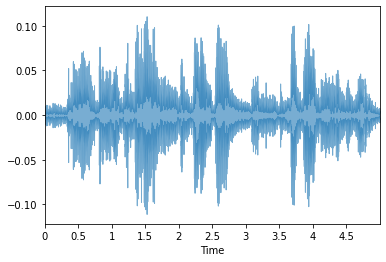

In [23]:
seg = 'demand/pid_1.wav'
y, sr = librosa.load(seg)
librosa.display.waveplot(y, sr=sr, x_axis='time', alpha = 0.6 )
plt.savefig('pid1.png')
# spectrogram_melfreq(seg, 512, my_dpi = 256)

In [24]:
seg = 'demand/dev_1.wav'
y, sr = librosa.load(seg)
librosa.display.waveplot(y, sr=sr, x_axis='time', alpha = 0.6 )
plt.savefig('dev1.png')
spectrogram_melfreq(seg, 128, my_dpi = 256)

<Figure size 432x288 with 0 Axes>

# Trials

#### Spectrogram Variants for RECOLA

In [ ]:
file = 'recola/raw/recordings_audio/dev_1.wav'
from pydub import AudioSegment
from pydub.utils import make_chunks

myaudio = AudioSegment.from_file(file , "wav") 
chunk_length_ms = 1000 # pydub calculates in millisec
chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec

#Export all of the individual chunks as wav files

for chunk in chunks[:1]:
    # chunk_name = "chunk{0}.wav".format(i)
    chunk.export('segment.wav', format="wav")
file = 'segment.wav'
wave, sr = librosa.load(file)    

In [ ]:
## Variant 1

## #Speech/Music contemporary values
n_mels = 512      # Typical Mel Bands for speech [Tested for best discrimination]
n_fft = 2048      # Window Length for FFT (Speech/Music contemporary values)
win_length = math.floor(sr * 0.03)
hop_length = math.floor(sr * 0.015)

S = librosa.feature.melspectrogram(y=wave, sr=sr, n_mels=n_mels, hop_length = hop_length, win_length = win_length,  n_fft = n_fft)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr, fmax=8000)
plt.savefig( 'r_spec_1.png' , dpi=my_dpi, bbox_inches='tight', pad_inches=0)

## Variant 2

## #Speech/Music contemporary values
n_mels = 512      # Typical Mel Bands for speech [Tested for best discrimination]
n_fft = 2048      # Window Length for FFT (Speech/Music contemporary values)
hop_length = 512  # Amount of Shift per FFT
win_length = n_fft

S = librosa.feature.melspectrogram(y=wave, sr=sr, n_mels=n_mels, hop_length = hop_length, win_length = win_length,  n_fft = n_fft)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr, fmax=8000)
plt.savefig( 'r_spec_2.png' , dpi=my_dpi, bbox_inches='tight', pad_inches=0)

## Variant 3

## #Speech/Music contemporary values
n_mels = 512      # Typical Mel Bands for speech [Tested for best discrimination]
n_fft = 1024      # Window Length for FFT (Speech/Music contemporary values)
win_length = math.floor(sr * 0.03)
hop_length = math.floor(sr * 0.015)

S = librosa.feature.melspectrogram(y=wave, sr=sr, n_mels=n_mels, hop_length = hop_length, win_length = win_length,  n_fft = n_fft)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr, fmax=8000)
plt.savefig( 'r_spec_3.png' , dpi=my_dpi, bbox_inches='tight', pad_inches=0)

## Variant 4

## #Speech/Music contemporary values
n_mels = 128      # Typical Mel Bands for speech [Tested for best discrimination]
n_fft = 2048      # Window Length for FFT (Speech/Music contemporary values)
hop_length = 512  # Amount of Shift per FFT
win_length = n_fft # math.floor(sr * 0.03)

S = librosa.feature.melspectrogram(y=wave, sr=sr, n_mels=n_mels, hop_length = hop_length, n_fft = n_fft)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr, fmax=8000)
plt.savefig( 'r_spec_4.png' , dpi=my_dpi, bbox_inches='tight', pad_inches=0)

#### Spectrogram Variants for K-EmoCon

In [ ]:
file = 'kemocon/processed/audio_data_p/pid_1.wav'
from pydub import AudioSegment
from pydub.utils import make_chunks

myaudio = AudioSegment.from_file(file , "wav") 
chunk_length_ms = 1000 # pydub calculates in millisec
chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec

#Export all of the individual chunks as wav files

for chunk in chunks[:1]:
    # chunk_name = "chunk{0}.wav".format(i)
    chunk.export('segment.wav', format="wav")
file = 'segment.wav'
wave, sr = librosa.load(file)    

In [ ]:
## Variant 1

## #Speech/Music contemporary values
n_mels = 512      # Typical Mel Bands for speech [Tested for best discrimination]
n_fft = 2048      # Window Length for FFT (Speech/Music contemporary values)
win_length = math.floor(sr * 0.03)
hop_length = math.floor(sr * 0.015)

S = librosa.feature.melspectrogram(y=wave, sr=sr, n_mels=n_mels, hop_length = hop_length, win_length = win_length,  n_fft = n_fft)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr, fmax=8000)
plt.savefig( 'r_spec_1.png' , dpi=my_dpi, bbox_inches='tight', pad_inches=0)

## Variant 2

## #Speech/Music contemporary values
n_mels = 512      # Typical Mel Bands for speech [Tested for best discrimination]
n_fft = 2048      # Window Length for FFT (Speech/Music contemporary values)
hop_length = 512  # Amount of Shift per FFT
win_length = n_fft

S = librosa.feature.melspectrogram(y=wave, sr=sr, n_mels=n_mels, hop_length = hop_length, win_length = win_length,  n_fft = n_fft)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr, fmax=8000)
plt.savefig( 'r_spec_2.png' , dpi=my_dpi, bbox_inches='tight', pad_inches=0)

## Variant 3

## #Speech/Music contemporary values
n_mels = 512      # Typical Mel Bands for speech [Tested for best discrimination]
n_fft = 1024      # Window Length for FFT (Speech/Music contemporary values)
win_length = math.floor(sr * 0.03)
hop_length = math.floor(sr * 0.015)

S = librosa.feature.melspectrogram(y=wave, sr=sr, n_mels=n_mels, hop_length = hop_length, win_length = win_length,  n_fft = n_fft)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr, fmax=8000)
plt.savefig( 'r_spec_3.png' , dpi=my_dpi, bbox_inches='tight', pad_inches=0)

## Variant 4

## #Speech/Music contemporary values
n_mels = 128      # Typical Mel Bands for speech [Tested for best discrimination]
n_fft = 2048      # Window Length for FFT (Speech/Music contemporary values)
hop_length = 512  # Amount of Shift per FFT
win_length = n_fft # math.floor(sr * 0.03)

S = librosa.feature.melspectrogram(y=wave, sr=sr, n_mels=n_mels, hop_length = hop_length, n_fft = n_fft)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr, fmax=8000)
plt.savefig( 'r_spec_4.png' , dpi=my_dpi, bbox_inches='tight', pad_inches=0)

### Plots


In [ ]:
def plot_loss(r):
    fig, ax = plt.subplots(1, 2,figsize=(15,7))
    for a in r:
        if  a.split('/')[5] == 'arousal':
            l = a.split('/')[4]
            df = np.load(a, allow_pickle=True).item()
            ax[0].plot(df['val_loss'], label=l) 
            ax[0].legend()
            ax[0].set_ylim(ymin=0)
        if  a.split('/')[5] == 'valence':
            l = a.split('/')[4]
            df = np.load(a, allow_pickle=True).item()
            ax[1].plot(df['val_loss'], label=l) 
            ax[1].legend()
            ax[1].set_ylim(ymin=0)

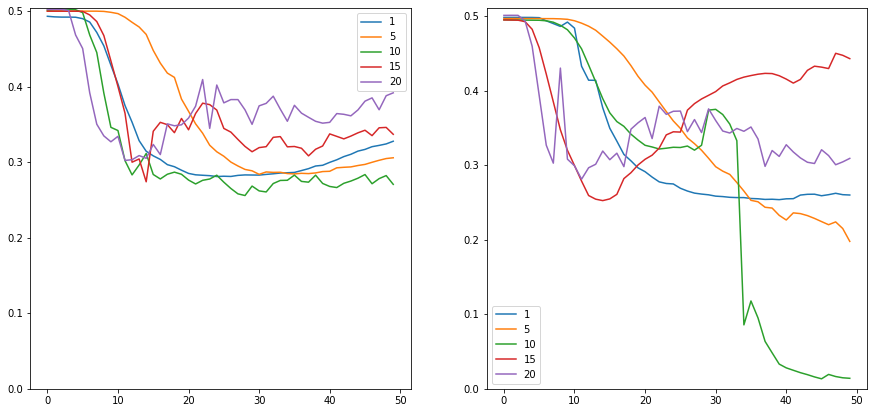

In [ ]:
results = 'kemocon/data_models/multi_keras_participants_1s/5'
r = glob.glob(results+'*/*/*/*.npy')
plot_loss(r)

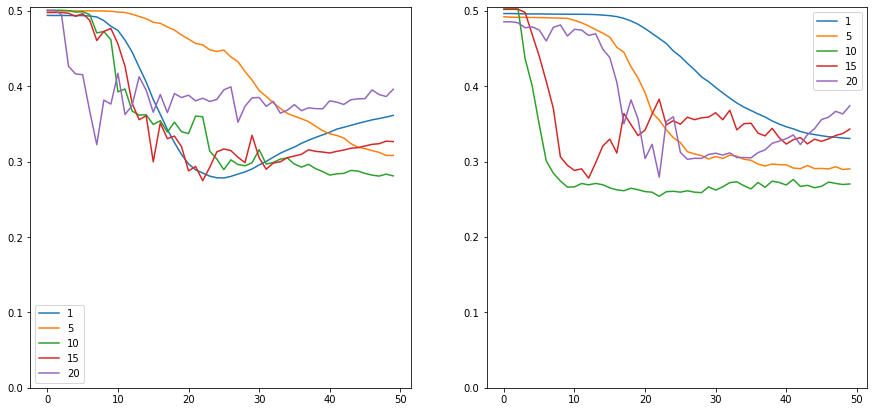

In [ ]:
results = 'kemocon/data_models/multi_keras_participants_1s/15'
r = glob.glob(results+'*/*/*/*.npy')
plot_loss(r)

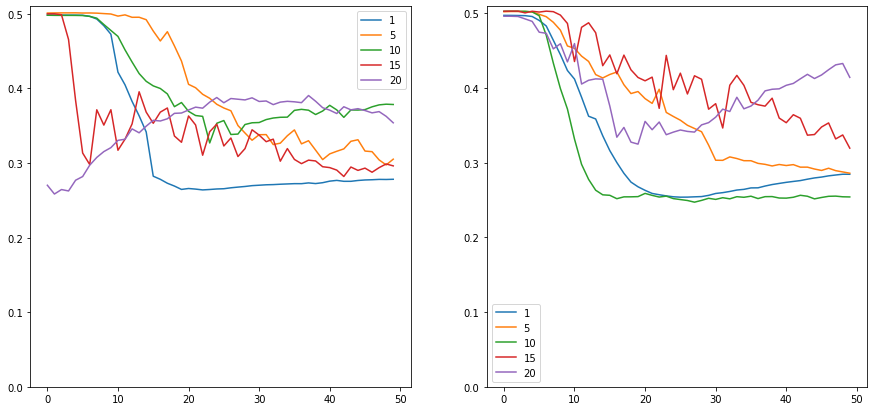

In [ ]:
results = 'kemocon/data_models/multi_keras_participants_1s/22'
r = glob.glob(results+'*/*/*/*.npy')
plot_loss(r)

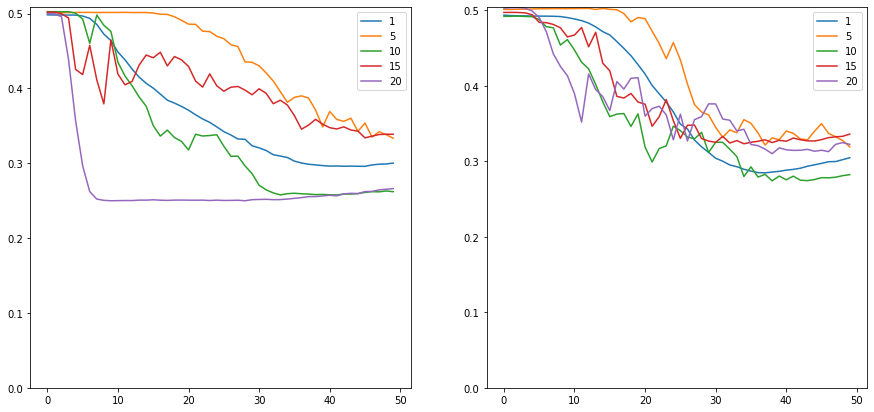

In [ ]:
results = 'kemocon/data_models/multi_keras_participants_1s/23'
r = glob.glob(results+'*/*/*/*.npy')
plot_loss(r)

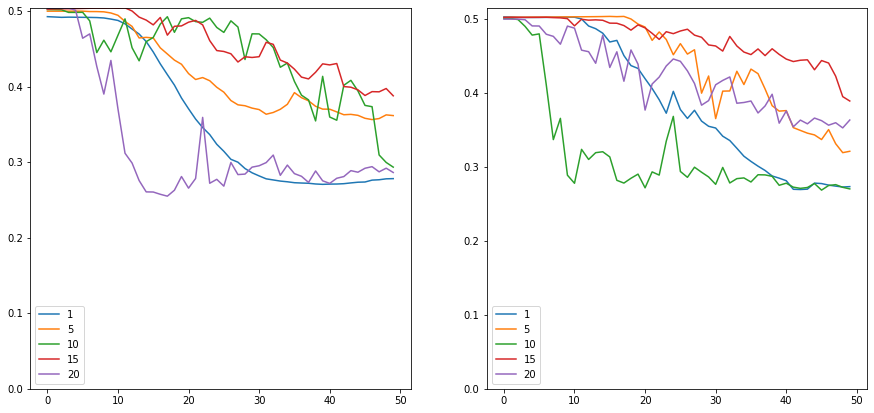

In [ ]:
results = 'kemocon/data_models/multi_keras_participants_1s/30'
r = glob.glob(results+'*/*/*/*.npy')
plot_loss(r)

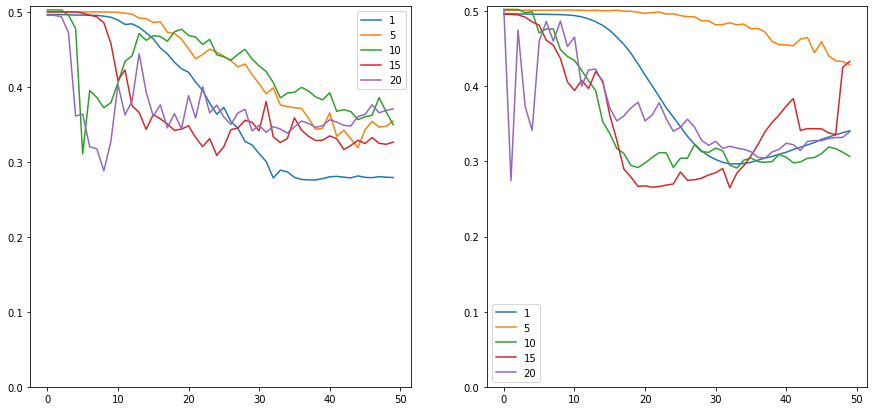

In [ ]:
results = 'kemocon/data_models/multi_keras_participants_1s/31'
r = glob.glob(results+'*/*/*/*.npy')
plot_loss(r)

### Visualkeras

In [ ]:
model = siamese_network(input_dim_eda,input_dim_bvp, input_dim_aud, input_dim_ege)
optimizer = optimizers.RMSprop(learning_rate = 0.025)
model.compile(loss=loss(margin=margin), optimizer= optimizer, metrics=["accuracy"])

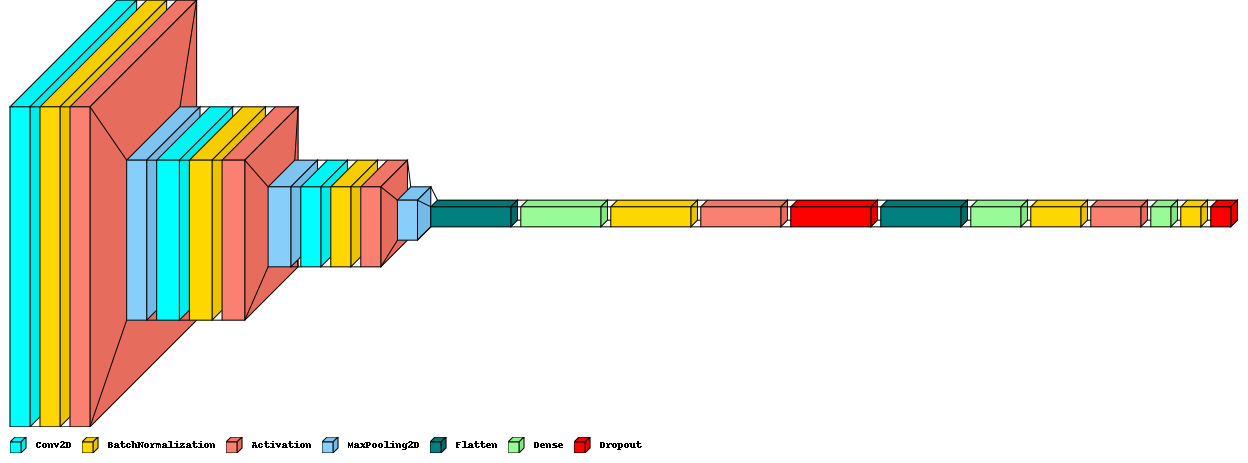

In [ ]:
from PIL import ImageFont
from collections import defaultdict

model = aud_embed(input_dim_aud)


font = ImageFont.load_default()
color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'cyan'
color_map[MaxPool2D]['fill'] = 'lightskyblue'
color_map[Dropout]['fill'] = 'red'
color_map[BatchNormalization]['fill'] = 'gold'
color_map[Dense]['fill'] = 'palegreen'
color_map[Activation]['fill'] = 'salmon'
color_map[Flatten]['fill'] = 'teal'

model.add(visualkeras.SpacingDummyLayer(spacing=50))

visualkeras.layered_view(model,scale_xy=5, max_z=80, legend=True, font=font, color_map=color_map, to_file='aud.png')

In [ ]:
from PIL import ImageFont
from collections import defaultdict
from see_rnn import get_gradients, features_0D, features_1D, features_2D

model = eda_embed(input_dim_eda) #,input_dim_bvp, input_dim_aud, input_dim_ege)


font = ImageFont.load_default()
color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'cyan'
color_map[MaxPool2D]['fill'] = 'lightskyblue'
color_map[Dropout]['fill'] = 'red'
color_map[BatchNormalization]['fill'] = 'gold'
color_map[Dense]['fill'] = 'palegreen'
color_map[Activation]['fill'] = 'salmon'
color_map[Flatten]['fill'] = 'teal'

model.add(visualkeras.SpacingDummyLayer(spacing=50))

visualkeras.layered_view(model,  legend=True, font=font, color_map=color_map, to_file='eda.png')

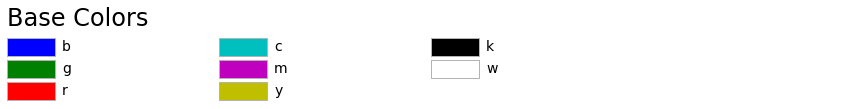

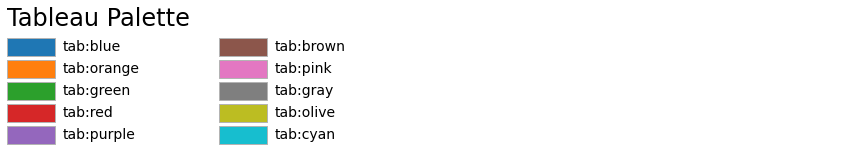

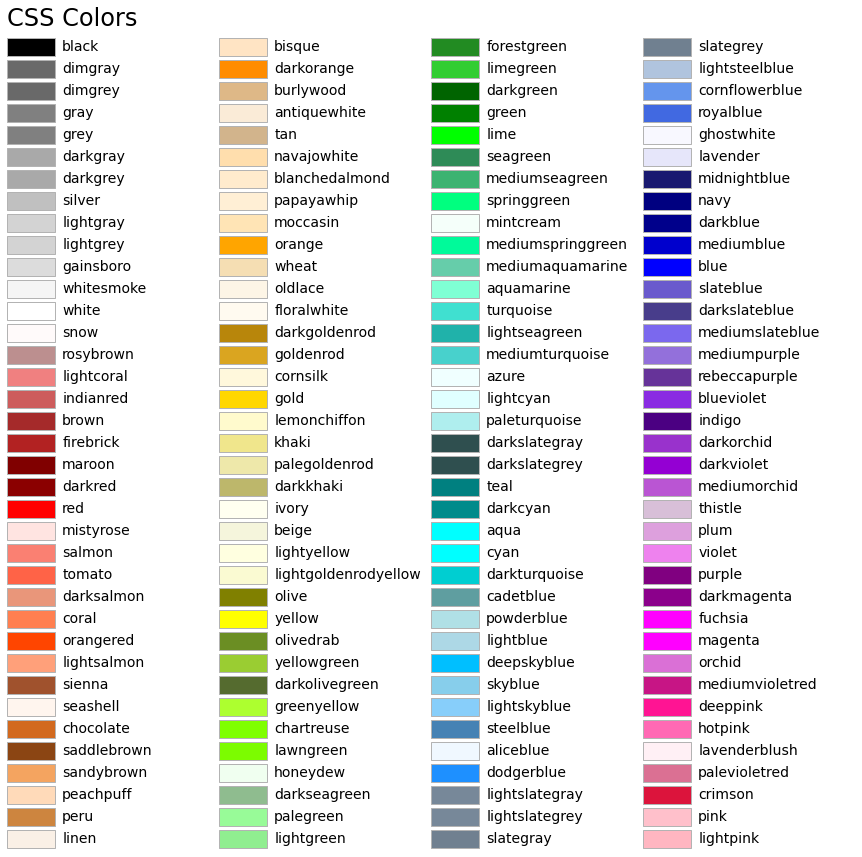

In [ ]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
                sort_colors=False, emptycols=2)

plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

# Optionally plot the XKCD colors (Caution: will produce large figure)
# xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
# xkcd_fig.savefig("XKCD_Colors.png")

plt.show()

In [ ]:

## Load and Compile Model 
model = siamese_network(input_dim_eda,input_dim_bvp, input_dim_aud, input_dim_ege)
optimizer = optimizers.RMSprop(learning_rate = 0.025)
model.compile(loss=loss(margin=margin), optimizer= optimizer, metrics=["accuracy"])

## Training on Support Set
history = model.fit([e1tr, b1tr, a1tr, eg1tr, e2tr, b2tr, a2tr, eg2tr], ltr, validation_data= ([e1ts, b1ts, a1ts, eg1ts, e2ts, b2ts, a2ts, eg2ts], lts) , verbose=1, epochs=epochs,  shuffle = True,callbacks=[lr_rate])#, early_stopping])

## Plot of Contrastive Loss and Accuracy
my_plot(history=history.history, metric1="accuracy",metric2="loss", label= "Performance of Arousal Prediction with " + str(shots) + " shots for Participant " + str(pid), plot_label=str(pid) + "_" + str(shots)+ "_Arousal", pid = pid, has_valid=True)

## Evaluate Model
results = model.evaluate([e1ts, b1ts, a1ts, eg1ts, e2ts, b2ts, a2ts, eg2ts], lts, verbose=0)
print("test loss, test acc:", results)

## Predict on Query Set
predictions = np.concatenate(model.predict([e1ts, b1ts, a1ts, eg1ts, e2ts, b2ts, a2ts, eg2ts]), axis=0)
print("Prediction Accuracy on Support Set")
print(compute_accuracy(lts,predictions))


# ## Save model
# base_dir + model_name +'.npy', np.array(history.history))
# model.save( base_dir + model_name, save_format='tf')

Epoch 1/100
2/2 [==============================] - 35s 7s/step - loss: 0.2701 - accuracy: 0.5500 - val_loss: 0.4946 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 2s 1s/step - loss: 0.2392 - accuracy: 0.6333 - val_loss: 0.4945 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 2s 1s/step - loss: 0.2151 - accuracy: 0.6333 - val_loss: 0.4942 - val_accuracy: 0.5075
Epoch 4/100
2/2 [==============================] - 2s 1s/step - loss: 0.2134 - accuracy: 0.6333 - val_loss: 0.4940 - val_accuracy: 0.5075
Epoch 5/100
2/2 [==============================] - 2s 1s/step - loss: 0.1695 - accuracy: 0.7500 - val_loss: 0.4938 - val_accuracy: 0.5075
Epoch 6/100
2/2 [==============================] - 2s 1s/step - loss: 0.1624 - accuracy: 0.7500 - val_loss: 0.4935 - val_accuracy: 0.5075
Epoch 7/100
2/2 [==============================] - 2s 1s/step - loss: 0.1302 - accuracy: 0.8333 - val_loss: 0.4933 - val_accuracy: 0.5075
Epoch 8/100
2/2 [================

### decay_rate

In [ ]:
learning_rate = [0.03, 0.01, 0.003, 0.001, 0.0003]
batch_size = [32, 64]
dr = [0.025, 0.03, 0.04, 0.05] 
for m in dr:
    for j in learning_rate:
        for i in batch_size:
                model = siamese_network(input_dim_eda,input_dim_bvp, input_dim_aud, input_dim_ege)
                optimizer = optimizers.RMSprop(learning_rate=j)
                model.compile(loss=loss(margin=margin), optimizer= optimizer, metrics=["binary_accuracy"])
                history = model.fit([e1tr, b1tr, a1tr, eg1tr, e2tr, b2tr, a2tr, eg2tr], ltr, validation_data= ([e1ts, b1ts, a1ts, eg1ts, e2ts, b2ts, a2ts, eg2ts], lts) , batch_size= i, verbose=0, epochs=epochs,  shuffle = True, callbacks=[lr_rate])
                fig, ax = plt.subplots(1, 2,figsize=(10,3))
                ax[0].plot(history.history['binary_accuracy'], color = 'r') 
                ax[0].plot(history.history['val_binary_accuracy'], color = 'b' )
                ax[1].plot(history.history['loss'], color = 'r') 
                ax[1].plot(history.history['val_loss'], color = 'b') 
                fig.suptitle("lr = {j}  bs = {i}".format(j=j, i=i))
                plt.savefig(base_dir + 'dr_' + str(m) + 'bs_' + str(i) + 'lr_' + str(j) + '.png')
                del model 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


# New Wave

In [ ]:
seg = 'demand/dev_1.wav'

a, sr = librosa.load(seg)
print(sr)

22050


In [ ]:
## Label Stack with corresponding participants
f_name = 'f1.arff'

## Extract Arousal Labels
p = os.path.join(f_name)
dataset = arff.loads(open(p), 'r')

In [ ]:
# dataset
df_a = pd.DataFrame(dataset['data']) #, columns=['pid','frameTime','GoldStandard'])

In [ ]:
df_a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096,4097
0,dev_1.wav,0.0,0.069636,0.991965,0.0,0.0,0.000000,0.00000,1.106003,0.312007,0.000000,0.359577,2.489551,0.000000,1.150049,0.0,0.0,0.000000,0.157764,0.0,0.0,0.0,0.774618,0.0,0.862011,1.330236,0.000000,0.000000,0.000000,0.696240,0.584020,1.549860,0.585577,0.370669,0.000000,0.000000,0.0,1.225053,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.268384,0.0,0.000000,0.767694,0.0,0.0,1.881841,1.837731,2.164471,0.0,0.0,0.0,0.000000,2.686197,1.327724,0.0,0.000000,0.000000,0.895855,0.780633,0.0,1.372469,0.0,0.0,0.930388,1.886133,1.541565,0.087707,0.321439,0.000000,0.000000,0.0,0.846165,0.283864
1,dev_1.wav,0.4,0.000000,0.493424,0.0,0.0,0.000000,0.00000,0.131018,0.497110,0.572243,0.000000,2.624819,0.000000,1.016538,0.0,0.0,0.568293,0.000000,0.0,0.0,0.0,0.236938,0.0,1.050924,1.501431,0.632005,0.000000,0.000000,0.810496,1.048678,0.905138,0.000000,0.000000,0.000000,0.000000,0.0,2.070740,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.494713,0.0,0.099216,0.686918,0.0,0.0,1.021956,2.295513,2.406404,0.0,0.0,0.0,0.115059,2.449243,0.450594,0.0,0.000000,0.000000,0.905881,1.655123,0.0,0.725656,0.0,0.0,1.016148,1.309252,1.813455,0.000000,1.042338,0.146365,0.000000,0.0,0.695923,0.000000
2,dev_1.wav,0.8,0.000000,1.077932,0.0,0.0,0.000000,0.00000,1.028281,1.079142,0.209369,0.000000,1.733408,0.000000,1.324114,0.0,0.0,0.011091,0.261147,0.0,0.0,0.0,0.958247,0.0,0.912064,0.976077,0.000000,0.000000,0.000000,0.816561,0.218744,1.248838,0.401871,0.000000,0.000000,0.000000,0.0,1.456682,0.006766,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.399649,0.0,0.000000,0.473973,0.0,0.0,1.682428,1.984009,1.740264,0.0,0.0,0.0,0.173096,2.456346,0.745497,0.0,0.040421,0.000000,0.877686,1.264285,0.0,1.334887,0.0,0.0,0.628171,1.963635,1.354642,0.000000,0.164981,0.000000,0.000000,0.0,0.795720,0.235618
3,dev_1.wav,1.2,0.000000,0.879257,0.0,0.0,0.000000,0.33556,1.123698,0.000000,0.000000,0.629032,1.578617,0.189916,1.494583,0.0,0.0,0.461716,0.000000,0.0,0.0,0.0,0.734685,0.0,0.486365,2.156416,0.000000,0.973121,0.679951,0.000000,0.913928,0.000000,1.070998,1.126212,0.163293,0.000000,0.0,2.143523,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.746719,0.0,0.363855,0.359905,0.0,0.0,0.998140,2.935246,0.000000,0.0,0.0,0.0,0.000000,2.433043,0.242317,0.0,0.000000,0.000000,1.271479,0.646634,0.0,1.203123,0.0,0.0,1.590880,0.951986,1.344407,0.284780,0.000000,0.003474,0.994664,0.0,0.353394,0.000000
4,dev_1.wav,1.6,0.000000,1.931499,0.0,0.0,0.000000,0.00000,1.746409,0.000000,0.000000,0.000000,2.423070,0.000000,1.268734,0.0,0.0,0.597773,0.000000,0.0,0.0,0.0,0.870105,0.0,0.326016,2.247505,0.000000,0.000000,0.000000,0.000000,0.496872,0.598600,0.207121,0.000000,0.000000,0.000000,0.0,0.971579,0.074984,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.329952,0.0,0.590544,0.798981,0.0,0.0,0.895596,2.715981,0.902724,0.0,0.0,0.0,0.216131,1.413807,1.360008,0.0,0.000000,0.000000,0.478504,0.589245,0.0,0.399211,0.0,0.0,0.735928,1.258607,0.944631,0.000000,0.000000,0.000000,0.065302,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,dev_1.wav,298.0,0.000000,0.852450,0.0,0.0,0.000000,0.00000,0.814734,0.000000,0.000000,0.522337,1.850409,0.000000,0.418914,0.0,0.0,0.037828,0.000000,0.0,0.0,0.0,0.607454,0.0,0.772206,1.051755,0.000000,0.000000,0.588654,0.773335,0.522544,1.661023,0.155202,0.000000,0.330247,0.132475,0.0,2.137117,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.034864,0.0,0.468725,0.107162,0.0,0.0,0.478427,2.300943,1.098638,0.0,0.0,0.0,0.000000,2

#  Clean-up

In [ ]:
import shutil
import os
import gc
import tables
import h5py

In [ ]:
lib = '_libraries'
for file in os.listdir(lib):
  if file.endswith('.dist-info'):
    shutil.rmtree(os.path.join(lib,file))

for obj in gc.get_objects():   # Browse through ALL objects
    if isinstance(obj, h5py.File):   # Just HDF5 files
        try:
            obj.close()
        except:
            pass # Was already closed

tables.file._open_files.close_all()